<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Hydrofoil_abril_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [5]:
df.head(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [6]:
df.tail(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [7]:
Dat_Select=df.iloc[:,2:]

In [8]:
Dat_Select.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [9]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()

X = Dat_Select[['Hydrofoil','Froude']]
y = np.array(Dat_Select[['Power']]).reshape(-1,1)


In [10]:
scaler = preprocessing.MinMaxScaler((-1,1)).fit(X)
scalerY = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [11]:
print(y)

[[0.00000000e+00]
 [9.50991210e-01]
 [1.62400037e+00]
 [3.80396484e+00]
 [5.51721208e+00]
 [7.73229007e+00]
 [9.99272302e+01]
 [2.89906013e+02]
 [4.58816682e+02]
 [6.89102861e+02]
 [1.00512456e+03]
 [1.31039273e+03]
 [1.56840396e+03]
 [1.90929774e+03]
 [2.12982528e+03]
 [2.28384197e+03]
 [3.23995097e+03]
 [0.00000000e+00]
 [8.30288480e+00]
 [1.03877501e+02]
 [3.06146017e+02]
 [4.60864971e+02]
 [6.62036188e+02]
 [8.88811015e+02]
 [1.11119665e+03]
 [1.43965439e+03]
 [1.82370853e+03]
 [2.26561951e+03]
 [2.38479334e+03]
 [2.88369796e+03]
 [3.25010756e+03]
 [0.00000000e+00]
 [8.12000187e+00]
 [1.05340565e+02]
 [3.09437909e+02]
 [4.60864971e+02]
 [6.47405554e+02]
 [8.26045596e+02]
 [1.02414438e+03]
 [1.33431382e+03]
 [1.69532471e+03]
 [2.08694290e+03]
 [2.20922573e+03]
 [2.35085027e+03]
 [2.68618440e+03]
 [0.00000000e+00]
 [8.41261455e+00]
 [1.06803628e+02]
 [3.03951421e+02]
 [4.43308210e+02]
 [6.15949691e+02]
 [7.81275856e+02]
 [9.67816439e+02]
 [1.25706407e+03]
 [1.57352469e+03]
 [1.972589

In [12]:
print(X)

    Hydrofoil    Froude
0           1  0.000000
1           1  0.103733
2           1  0.124480
3           1  0.165973
4           1  0.186719
5           1  0.207466
6           1  0.414932
7           1  0.622398
8           1  0.829864
9           1  1.037330
10          1  1.244797
11          1  1.452263
12          1  1.659729
13          1  1.867195
14          1  2.026944
15          1  2.074661
16          1  2.400383
17          2  0.000000
18          2  0.207466
19          2  0.414932
20          2  0.622398
21          2  0.829864
22          2  1.037330
23          2  1.244797
24          2  1.452263
25          2  1.659729
26          2  1.867195
27          2  2.026944
28          2  2.074661
29          2  2.240634
30          2  2.400383
31          3  0.000000
32          3  0.207466
33          3  0.414932
34          3  0.622398
35          3  0.829864
36          3  1.037330
37          3  1.244797
38          3  1.452263
39          3  1.659729
40          3  1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = scalerY.transform(y_train)
y_test = scalerY.transform(y_test)

In [15]:
'''
print(X_train.head(2))
print('===============')
print(y_train.head(2))
print('=============')
print(X_test.head(2))
print('===============')
print(y_test.head(2))
'''

"\nprint(X_train.head(2))\nprint('===============')\nprint(y_train.head(2))\nprint('=============')\nprint(X_test.head(2))\nprint('===============')\nprint(y_test.head(2))\n"

In [16]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8),random_state=1)

In [17]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [18]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [19]:
y_train

array([[-0.60160977],
       [-1.        ],
       [-0.71766062],
       [-1.        ],
       [-0.93850835],
       [-0.9966049 ],
       [-0.03170916],
       [-0.9360775 ],
       [ 1.        ],
       [-0.62096658],
       [ 0.65298185],
       [ 0.21386128],
       [ 0.4053947 ],
       [-0.57595073],
       [ 0.39418125],
       [ 0.12224503],
       [ 0.99375   ],
       [-0.31620931],
       [-0.93517718],
       [ 0.26044368],
       [ 0.28423005],
       [-0.19363116],
       [-0.99500324],
       [-0.40444036],
       [ 0.04324222],
       [-0.49168107],
       [ 0.77452463],
       [ 0.44662921],
       [-0.99941479],
       [-0.71640017],
       [-0.99900065],
       [-0.99482318],
       [-0.17891098],
       [-0.71640017],
       [-0.45305748],
       [-0.81295916],
       [-0.38148228],
       [-0.5926066 ],
       [-0.9948907 ],
       [ 0.41961971],
       [-0.81160869],
       [-0.8216022 ],
       [ 0.35947854],
       [ 0.31061834],
       [ 0.46751657],
       [-0

In [20]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scalerY.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scalerY.inverse_transform(np.array(y_test).reshape(-1,1))
y_cal_train=scalerY.inverse_transform(y_calc_train.reshape(-1,1))
y_cal_test=scalerY.inverse_transform(y_calc_test.reshape(-1,1))

In [21]:
y_calc_train

array([-0.59033876, -1.33324087, -0.5119517 , -1.18567001, -0.74655217,
       -0.86939259,  0.14112297, -0.93848435,  0.60451641, -0.56607745,
        0.45901217,  0.27337716,  0.33384106, -0.38767848,  0.29480302,
        0.16027471,  0.59109409, -0.18418788, -1.07184246,  0.31227643,
        0.27836713, -0.12056912, -1.20891006, -0.21197401,  0.13943161,
       -0.41196503,  0.47344488,  0.38967889, -0.91314533, -0.65968886,
       -0.90225099, -1.20357858, -0.04415702, -0.76123381, -0.34961324,
       -0.9030819 , -0.25751659, -0.50840131, -1.06597425,  0.44502267,
       -0.80307921, -0.63129257,  0.31928211,  0.29691921,  0.33490347,
       -0.3899764 , -0.22891362])

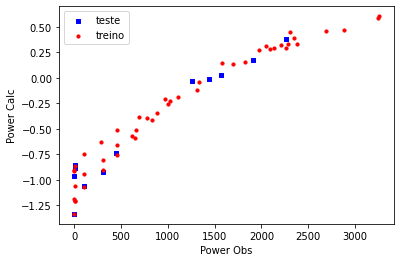

In [22]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [23]:
y_cal_test

array([[  53.32476775],
       [ 230.13915559],
       [ 126.26774083],
       [1910.26450601],
       [-544.42995703],
       [1569.38254967],
       [2241.22579701],
       [1603.0185278 ],
       [ -95.94084438],
       [1663.67349287],
       [ 425.86725671],
       [ 194.39734146]])

In [24]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 1263884.4455475493
R^2 teste= -0.9072412342660199


In [25]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 2264959.0720634507
R^2 treino= -1.3568612830831182
